In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
from sklearn import preprocessing

In [74]:
# load data https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?select=1429_1.csv
csv_path = "data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
df = pd.read_csv(csv_path)
df

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [76]:
#looking at different attributes
print('brand')
print(df['brand'].value_counts())
print()
print('reviews.didPurchase')
print(df['reviews.didPurchase'].value_counts())
print()
print('reviews.doRecommend')
print(df['reviews.doRecommend'].value_counts())
print()
print('reviews.id')
print(df['reviews.id'].unique().size)

brand
Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

reviews.didPurchase
True     8
False    1
Name: reviews.didPurchase, dtype: int64

reviews.doRecommend
True     15353
False      733
Name: reviews.doRecommend, dtype: int64

reviews.id
42


In [77]:
# Attribute Removal
# dropping unuseful cols, because they mainly contain null values
# dateSeen only specifies the date when the review was scraped
unuseful_cols = ['reviews.didPurchase', 'reviews.id', 'keys', 'reviews.dateSeen', 'imageURLs', 'sourceURLs', 'reviews.sourceURLs', 'dateUpdated']
df = df.drop(unuseful_cols, axis=1)
# rename columns to make them uniform and more self-explanatory (see DataFinity for documentation)
df = df.rename(columns={
    'dateAdded': 'productDateAdded',
    'name': 'productName',
    'reviews.date': 'reviewDate',
    'reviews.doRecommend': 'reviewDoRecommend',
    'reviews.numHelpful': 'reviewNumHelpful',
    'reviews.rating': 'reviewRating',
    'reviews.text': 'reviewText',
    'reviews.title': 'reviewTitle',
    'reviews.username': 'reviewUsername'
})
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,NaN,NaN,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,NaN,NaN,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,NaN,NaN,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,NaN,NaN,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07T00:00:00.000Z,True,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20T00:00:00.000Z,True,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30T00:00:00.000Z,True,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17T00:00:00.000Z,True,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ


In [78]:
# Data Cleansing
# set NaN values to 0
df['reviewNumHelpful'] = df['reviewNumHelpful'].fillna(0).astype('int16')
df['reviewDoRecommend'] = df['reviewDoRecommend'].fillna(0).astype('int16')
# set data types
df['reviewRating'] = df['reviewRating'].astype('int8')
df['reviewDate'] = pd.to_datetime(df['reviewDate']).dt.date
df['productDateAdded'] = pd.to_datetime(df['productDateAdded']).dt.date
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername
0,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02,0,0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31,0,0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06,0,0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28,0,0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22,0,0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07,1,0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20,1,0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30,1,0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17,1,0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ


In [79]:
# check for duplicates
df.duplicated().sum()

0

In [80]:
df['reviewRating'].describe()

count    28332.000000
mean         4.514048
std          0.934957
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviewRating, dtype: float64

In [81]:
df['reviewDoRecommend'].describe()

count    28332.000000
mean         0.541896
std          0.498250
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reviewDoRecommend, dtype: float64

In [82]:
df['reviewDate'].describe()

count          28332
unique          1275
top       2017-01-23
freq             532
Name: reviewDate, dtype: object

In [83]:
# Text Pre_processing / Additional Attributes
df['reviewTextLength'] = df['reviewText'].str.len()
df['reviewTitleLength'] = df['reviewTitle'].str.len()
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername,reviewTextLength,reviewTitleLength
0,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02,0,0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,139,88
1,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31,0,0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,67,57
2,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06,0,0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,56,50
3,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28,0,0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,67,52
4,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22,0,0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,57,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07,1,0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,116,9
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20,1,0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,83,25
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30,1,0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,317,28
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17,1,0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,241,44


In [84]:
# Data Scaling
review_text_length = df['reviewTextLength']
review_title_length = df['reviewTitleLength']
review_num_helpful = df['reviewNumHelpful']
min_max_scaler = preprocessing.MinMaxScaler()
# transform the column with log, to mend outliers with very long review texts
review_text_length = np.log(review_text_length + 1)
review_num_helpful = np.log(review_num_helpful + 1)
review_text_length_scaled = min_max_scaler.fit_transform(review_text_length.values.reshape(-1, 1))
review_title_length_scaled = min_max_scaler.fit_transform(review_title_length.values.reshape(-1, 1))
review_num_helpful = min_max_scaler.fit_transform(review_num_helpful.values.reshape(-1, 1))
df['reviewTextLength'] = review_text_length_scaled
df['reviewTitleLength'] = review_title_length_scaled
df['reviewNumHelpful'] = review_num_helpful
df

,id,productDateAdded,productName,asins,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername,reviewTextLength,reviewTitleLength
0,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02,0,0.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,0.509589,0.621429
1,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31,0,0.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,0.422972,0.400000
2,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06,0,0.0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,0.401806,0.350000
3,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28,0,0.0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,0.422972,0.364286
4,AVpgNzjwLJeJML43Kpxn,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22,0,0.0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,0.403892,0.385714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2016-12-07,1,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,0.488062,0.057143
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-20,1,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,0.448317,0.171429
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-01-30,1,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,0.607993,0.192857
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,53-004485,2017-02-17,1,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,0.575234,0.307143


In [85]:
# Data Transformation
# add review count to each author and scale it
review_counts = df['reviewUsername'].value_counts()
df['reviewUsernameReviewCount'] = df['reviewUsername'].map(review_counts)
review_counts = df['reviewUsernameReviewCount']
review_counts = np.log(review_counts + 1)
review_counts_scaled = min_max_scaler.fit_transform(review_counts.values.reshape(-1, 1))
df['reviewUsernameReviewCount'] = review_counts_scaled
# calculate days between productAdded and reviewDate
df['daysBetweenProductAddedAndReview'] = (df['reviewDate'] - df['productDateAdded']).dt.days
# encode Product into binary cols
#encoded_cols = pd.get_dummies(df['productName'], drop_first=True)
#df = pd.concat([df, encoded_cols], axis=1)
# encode category columns to binary columns
#encoded_cols = df['primaryCategories'].str.get_dummies(sep=',')
#df = pd.concat([df, encoded_cols], axis=1)
#encoded_cols = df['categories'].str.get_dummies(sep=',')
#df = pd.concat([df, encoded_cols], axis=1)
df.columns = df.columns.str.replace(' ', '_')
df.drop(["id", "asins", "brand", "categories", "primaryCategories", "manufacturer", "manufacturerNumber"], axis="columns", inplace=True)
df = df.loc[df["daysBetweenProductAddedAndReview"]>0]
df

,productDateAdded,productName,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername,reviewTextLength,reviewTitleLength,reviewUsernameReviewCount,daysBetweenProductAddedAndReview
0,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-03-02,0,0.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,0.509589,0.621429,0.000000,489
1,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-08-31,0,0.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,0.422972,0.400000,0.227333,306
2,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-12-06,0,0.0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,0.401806,0.350000,0.000000,403
3,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-03-28,0,0.0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,0.422972,0.364286,0.000000,150
4,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-04-22,0,0.0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,0.403892,0.385714,0.113667,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28299,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-03-31,1,0.0,4,I liked the screen size and easy to read books...,Works good. Easy setup.,Zoey,0.522568,0.157143,0.066491,25
28306,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-03-10,1,0.0,5,Nicer than my old fire. Better screen area to ...,Works great,Woodzy,0.388465,0.071429,0.066491,4
28311,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-04-28,1,0.0,5,I wanted a tablet that was easy to use that I ...,Works great for what I need.,Meli,0.488062,0.192857,0.000000,53
28324,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-05-05,1,0.0,4,"Got this for my mom, so she could check facebo...",Would buy again,newsguy,0.504335,0.100000,0.066491,60


In [86]:
# incorrect dateAdded
df.loc[:, 'productName_stemmed'] = df['productName'].str.split(',').str[0].str.split(' - ').str[0]
df['productName'].value_counts()
df['productName_stemmed'].value_counts()

/var/folders/bk/6h4yysys7p3c8qzjf_f6z3_r0000gn/T/ipykernel_20073/3949634351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'productName_stemmed'] = df['productName'].str.split(',').str[0].str.split(' - ').str[0]


AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                             7450
AmazonBasics AA Performance Alkaline Batteries (48 Count)                                              3146
Fire Kids Edition Tablet                                                                               2053
All-New Fire HD 8 Tablet with Alexa                                                                    1030
Fire Tablet                                                                                            1024
Fire Tablet with Alexa                                                                                 1017
All-New Fire HD 8 Tablet                                                                                752
Fire HD 8 Tablet with Alexa                                                                             551
All-New Fire HD 8 Kids Edition Tablet                                                                   526
Amazon Tap Smart Assistant A

# Data Exploration Moritz

In [87]:
df

,productDateAdded,productName,reviewDate,reviewDoRecommend,reviewNumHelpful,reviewRating,reviewText,reviewTitle,reviewUsername,reviewTextLength,reviewTitleLength,reviewUsernameReviewCount,daysBetweenProductAddedAndReview,productName_stemmed
0,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-03-02,0,0.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,0.509589,0.621429,0.000000,489,AmazonBasics AAA Performance Alkaline Batterie...
1,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-08-31,0,0.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,0.422972,0.400000,0.227333,306,AmazonBasics AAA Performance Alkaline Batterie...
2,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-12-06,0,0.0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,0.401806,0.350000,0.000000,403,AmazonBasics AAA Performance Alkaline Batterie...
3,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-03-28,0,0.0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,0.422972,0.364286,0.000000,150,AmazonBasics AAA Performance Alkaline Batterie...
4,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-04-22,0,0.0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,0.403892,0.385714,0.113667,540,AmazonBasics AAA Performance Alkaline Batterie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28299,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-03-31,1,0.0,4,I liked the screen size and easy to read books...,Works good. Easy setup.,Zoey,0.522568,0.157143,0.066491,25,Fire HD 8 Tablet with Alexa
28306,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-03-10,1,0.0,5,Nicer than my old fire. Better screen area to ...,Works great,Woodzy,0.388465,0.071429,0.066491,4,Fire HD 8 Tablet with Alexa
28311,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-04-28,1,0.0,5,I wanted a tablet that was easy to use that I ...,Works great for what I need.,Meli,0.488062,0.192857,0.000000,53,Fire HD 8 Tablet with Alexa
28324,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-05-05,1,0.0,4,"Got this for my mom, so she could check facebo...",Would buy again,newsguy,0.504335,0.100000,0.066491,60,Fire HD 8 Tablet with Alexa


<AxesSubplot: >

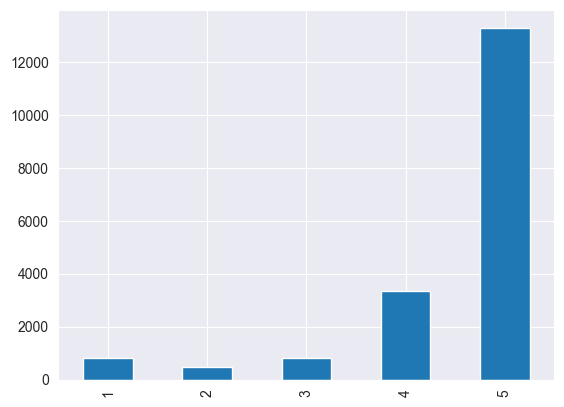

In [88]:
df['reviewRating'].value_counts().sort_index().plot.bar()

In [89]:
review_counts_per_user = df.groupby(["reviewUsername"]).size().sort_values(ascending=False).rename("ReviewCount").to_frame()
review_counts_per_user

,ReviewCount
reviewUsername,
ByAmazon Customer,839
ByKindle Customer,42
Mike,34
ByMike,21
Dave,18
...,...
ByMike D,1
ByMike Francis,1
ByMike Graham,1


In [90]:
df["reviewUsername"].nunique()

12191

In [91]:
review_counts_per_user.groupby(by="ReviewCount").size()

ReviewCount
1      8226
2      3188
3       438
4       147
5        70
6        43
7        22
8        10
9        11
10        5
11        7
12        3
13        5
14        3
15        4
16        3
17        1
18        1
21        1
34        1
42        1
839       1
dtype: int64

In [92]:
len(df["productName"].unique())

53

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmod

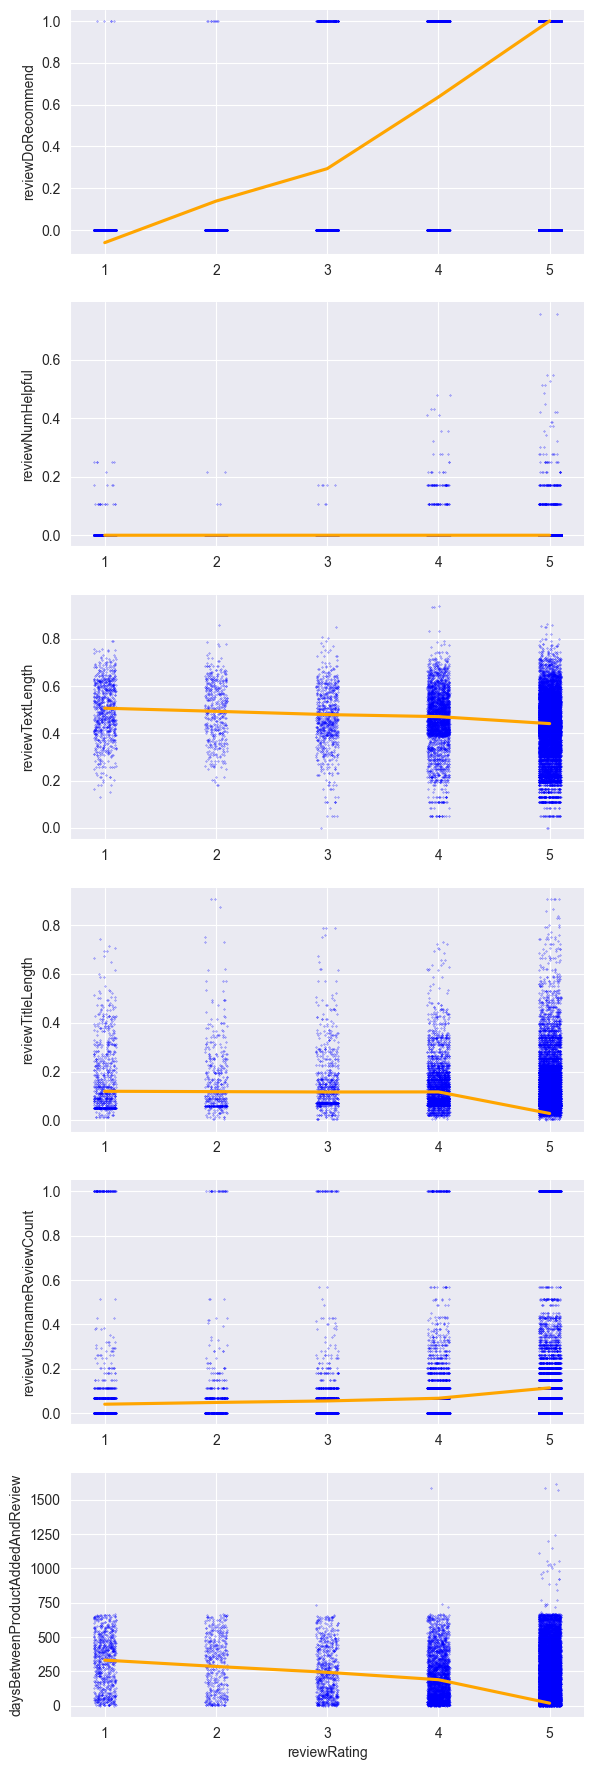

['reviewDoRecommend', 'reviewNumHelpful', 'reviewTextLength', 'reviewTitleLength', 'reviewUsernameReviewCount', 'daysBetweenProductAddedAndReview']


In [93]:
regression_columns = ['reviewDoRecommend', 'reviewNumHelpful', 'reviewTextLength', 'reviewTitleLength', 'reviewUsernameReviewCount', 'daysBetweenProductAddedAndReview']
pairplot = sns.pairplot(df, x_vars=['reviewRating'], y_vars=regression_columns, kind='reg', aspect=2, height=3, markers=".", plot_kws={"x_jitter":.1, "color":"orange", "lowess": True,"scatter_kws": {"color": "blue", "s":.3}})
for axis in pairplot.axes.flat:
    axis.tick_params(axis='both', labelleft=True, labelbottom=True)
plt.subplots_adjust(hspace=.2, wspace=.2)
plt.show()
print(regression_columns)

In [94]:
correlation_columns = regression_columns + ["reviewRating"]
correlation_columns.remove("reviewDoRecommend")
corr = df[correlation_columns].corr(method='pearson')
corr = corr.where(np.triu(np.ones(corr.shape)).astype("bool"))
np.fill_diagonal(corr.values, np.nan)
#corr = corr.stack().reset_index()
#corr = corr.iloc[:, 2]
corr

,reviewNumHelpful,reviewTextLength,reviewTitleLength,reviewUsernameReviewCount,daysBetweenProductAddedAndReview,reviewRating
reviewNumHelpful,NaN,0.130101,0.023983,-0.010344,-0.102966,-0.008760
reviewTextLength,NaN,NaN,0.399893,-0.066488,-0.228631,-0.173435
reviewTitleLength,NaN,NaN,NaN,-0.020135,0.001415,-0.093412
reviewUsernameReviewCount,NaN,NaN,NaN,NaN,0.032590,-0.018639
daysBetweenProductAddedAndReview,NaN,NaN,NaN,NaN,NaN,-0.056590
reviewRating,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#time_sorted = df[["productName","daysBetweenProductAddedAndReview","reviewRating"]].sort_values(by="daysBetweenProductAddedAndReview")
df["week"] = df.loc[:,"daysBetweenProductAddedAndReview"].floordiv(7, axis="index")
weekly_mean = df.groupby(["week"], as_index=False)[["reviewRating"]].mean()

weekly_mean["lowess_smoothed"] =lowess(weekly_mean["reviewRating"],weekly_mean["week"], frac=1/5)[:,1]
weekly_mean = weekly_mean[weekly_mean["week"]<90]
weekly_mean

/var/folders/bk/6h4yysys7p3c8qzjf_f6z3_r0000gn/T/ipykernel_20073/2753867594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"] = df.loc[:,"daysBetweenProductAddedAndReview"].floordiv(7, axis="index")


,week,reviewRating,lowess_smoothed
0,0,4.473558,4.518756
1,1,4.539340,4.519862
2,2,4.587234,4.521001
3,3,4.475973,4.522195
4,4,4.533333,4.523443
...,...,...,...
85,85,4.349206,4.355396
86,86,4.150943,4.356083
87,87,4.380952,4.356761
88,88,4.264706,4.357087


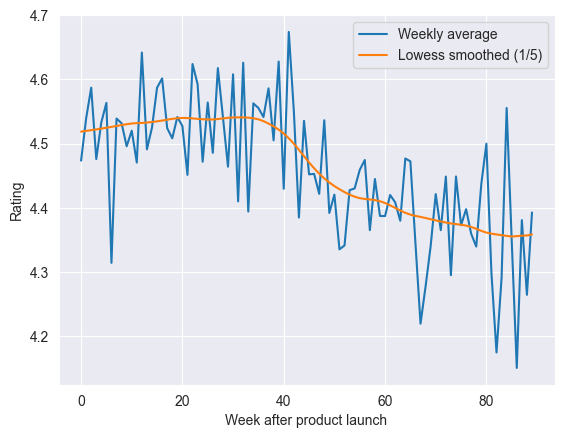

In [96]:
plt.plot(weekly_mean["week"], weekly_mean["reviewRating"], label="Weekly average")
plt.plot(weekly_mean["week"], weekly_mean["lowess_smoothed"], label="Lowess smoothed (1/5)")
plt.xlabel("Week after product launch")
plt.ylabel("Rating")
plt.legend()
plt.show()

In [97]:
np.sin(x) + stats.cauchy.rvs(size=len(x)).shape

NameError: name 'x' is not defined